# LCP Final Project - 2

## Physics

We now move on to the analysis concerning the events related to Physics. These are events taken under the same experimental conditions; in particular we have 45 GeV positrons hitting a $Be$ target and producing a $\mu ^+ - \mu^-$ pair. This time, hence, we cannot say in principle in which side of the detector we will find interesting events. 

In [15]:
# IPython objects
from IPython.display import display, Markdown

# Data analysis libraries
import numpy as np
np.random.seed(2020)
import pandas as pd
from scipy.stats import norm

# plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
hist_kwargs = {"edgecolor":"black"}

# others
from glob import glob
from tqdm.autonotebook import tqdm

# analysis functions
from Functions import *

data_path = "./data/"

In [16]:
physics_file = data_path+"RunMerged.txt"
#physics_file ="/Users/federicob/Documents/Physics_of_data/final_p/data/physics/merged/physics.txt" 

In [17]:
def Open_File_Physics(data_file):
    with open(data_file) as f:
        tot_ev = len(list(f))

    # loop over events and perform analysis
    Ev_list = []
    selected_ev = 0
    with open(data_file) as f:
        with tqdm(total=tot_ev) as pbar:
            for line in f:
                # read event
                ev, evNum, hits = Read_Data(line)
                # filter by hit position
                ev_left, ev_right, hits_left, hits_right = Points_Filter(ev)
                # select event
                sel_left,  chambers_left,  n_layers_left  = Select_Events_Calibration(ev_left,  hits_left)
                sel_right, chambers_right, n_layers_right = Select_Events_Calibration(ev_right, hits_right)
                
                if sel_left and sel_right: selected_ev += 1

                # save most important information, in order to plot or reperform the analysis
                # without reading the whole file again
                Ev_list.append(
                    {
                        "Number"    : evNum,
                        "Dataframe" : ev,
                        "Hits"      : hits,
                        "Accepted"  : sel_left and sel_right,
                        "Chambers"  : chambers_left+chambers_right,
                        "Layers"    : [n_layers_left, n_layers_right]
                    }
                )

                pbar.update()
                
    print("{:35} = {:d}"    .format("Total number of events in the Run", tot_ev))
    print("{:35} = {:d}"    .format("Number of accepted events"        , selected_ev))
    print("{:35} = {:.4f} %".format("Fraction of accepted events"      , selected_ev/tot_ev*100))
    return Ev_list

In [25]:
def Physics(Ev_list):
    tot_ev = len(Ev_list)
    selected_ev = 0
    # number of hits selected events
    Ev_hits = {"left":[], "right":[]}
    # angular coefficient of fit
    Ev_slope = {"left":[], "right":[]}
    # residuals from good events fit
    Ev_residuals = {"left":[], "right":[]}
    
    print("Performing fit and analysis")
    with tqdm(total=tot_ev) as pbar:
        for event in Ev_list:
            if event["Accepted"]:
                ev = event["Dataframe"]
                layers = event["Layers"]
        
                # filter by hit position
                ev_left, ev_right, hits_left, hits_right = Points_Filter(ev)
                # save hit numbers
                Ev_hits["left"] .append(hits_left )
                Ev_hits["right"].append(hits_right)
                
                # save slope values
                gf_results_left  = Global_Fit_Physics(ev_left , layers[0])
                gf_results_right = Global_Fit_Physics(ev_right, layers[1])
                Ev_slope["left"] .append(gf_results_left ["slope"])
                Ev_slope["right"].append(gf_results_right["slope"])
                
                # save residuals
                Ev_residuals["left"]  += gf_results_left ["residuals"]
                Ev_residuals["right"] += gf_results_right["residuals"]
                
            pbar.update()
            
    display(Markdown("#### Hit distribution (selected events)"))
    
    fig, (ax1, ax2) = plt.subplots(figsize=(15,5), ncols=2)
    ax1.hist(Ev_hits["left"],bins=6 , **hist_kwargs)
    ax1.set_title("Left Side")
    ax1.set_xlabel("Number of hits")
    ax2.hist(Ev_hits["right"],bins=6, **hist_kwargs)
    ax2.set_title("Right Side")
    ax2.set_xlabel("Number of hits")
    plt.show()

    display(Markdown("#### Slope distribution (selected events)"))

    fig, (ax1, ax2) = plt.subplots(figsize=(15,5), ncols=2)
    Gaussian_Fit_Hist(ax1, Ev_slope["left"] , nbins=30, **hist_kwargs)
    ax1.set_title("Left Side")
    ax1.set_xlabel("Slope")
    Gaussian_Fit_Hist(ax2, Ev_slope["right"], nbins=30, **hist_kwargs)
    ax2.set_title("Right Side")
    ax2.set_xlabel("Slope")
    plt.show()

    display(Markdown("#### Residuals"))

    fig, (ax1, ax2) = plt.subplots(figsize=(15,5), ncols=2)
    Gaussian_Fit_Hist(ax1, Ev_residuals["left"] , nbins=30, hist_range=(-25,25), **hist_kwargs)
    ax1.set_title("Left Side")
    ax1.set_xlabel("Residuals [mm]")
    Gaussian_Fit_Hist(ax2, Ev_residuals["right"], nbins=30, hist_range=(-25,25), **hist_kwargs)
    ax2.set_title("Right Side")
    ax2.set_xlabel("Residuals [mm]")
    plt.show()
            
    return Ev_hits, Ev_slope, Ev_residuals

In [19]:
Ev_list = Open_File_Physics(physics_file)


Total number of events in the Run   = 422291
Number of accepted events           = 773
Fraction of accepted events         = 0.1830 %


Performing fit and analysis


#### Hit distribution (selected events)

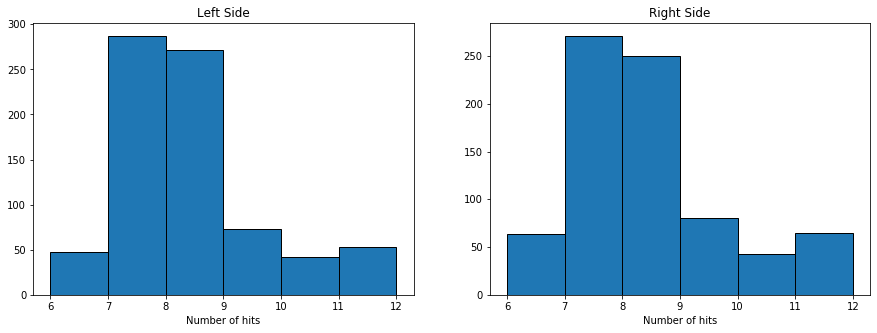

#### Slope distribution (selected events)

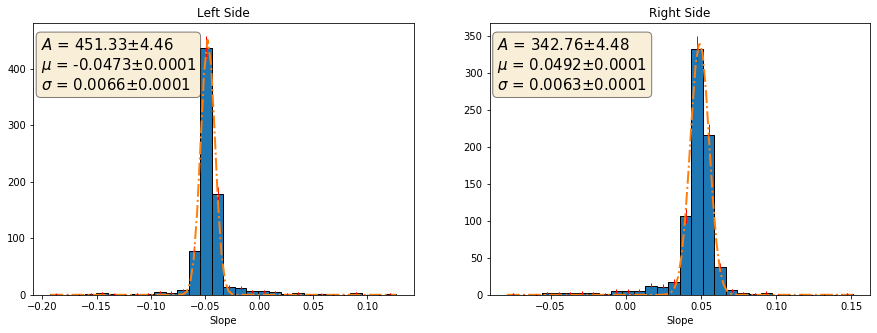

#### Residuals

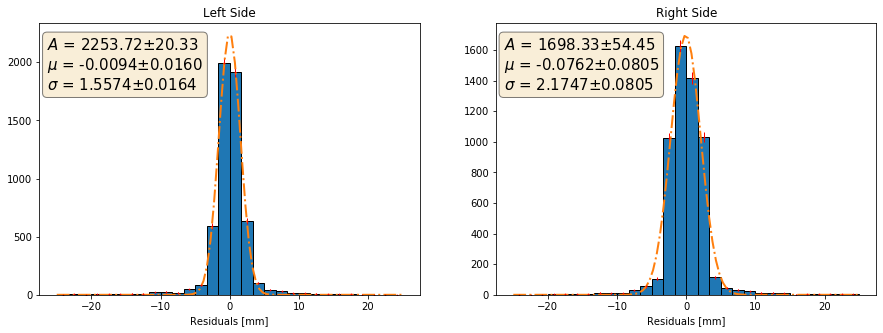

In [26]:
Ev_hits, Ev_slope, Ev_residuals = Physics(Ev_list)

In [21]:
good = [Ev_list[i] for i in range(len(Ev_list)) if Ev_list[i]["Accepted"]]

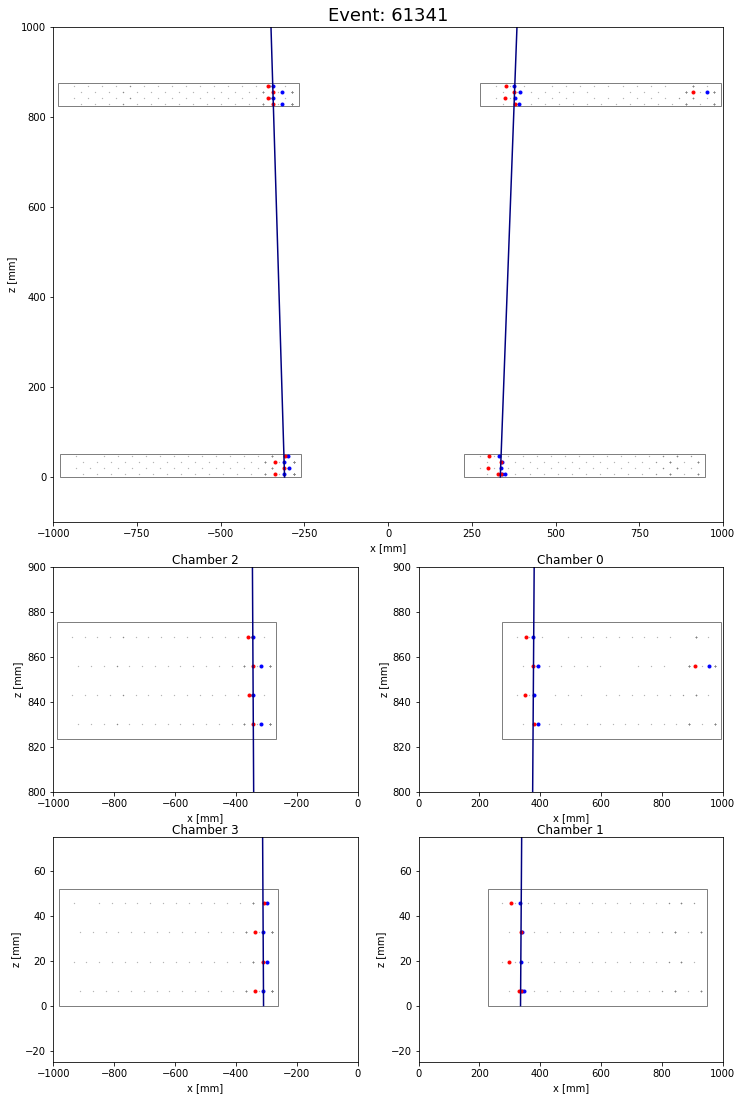

In [22]:
Make_Plot(good[356])

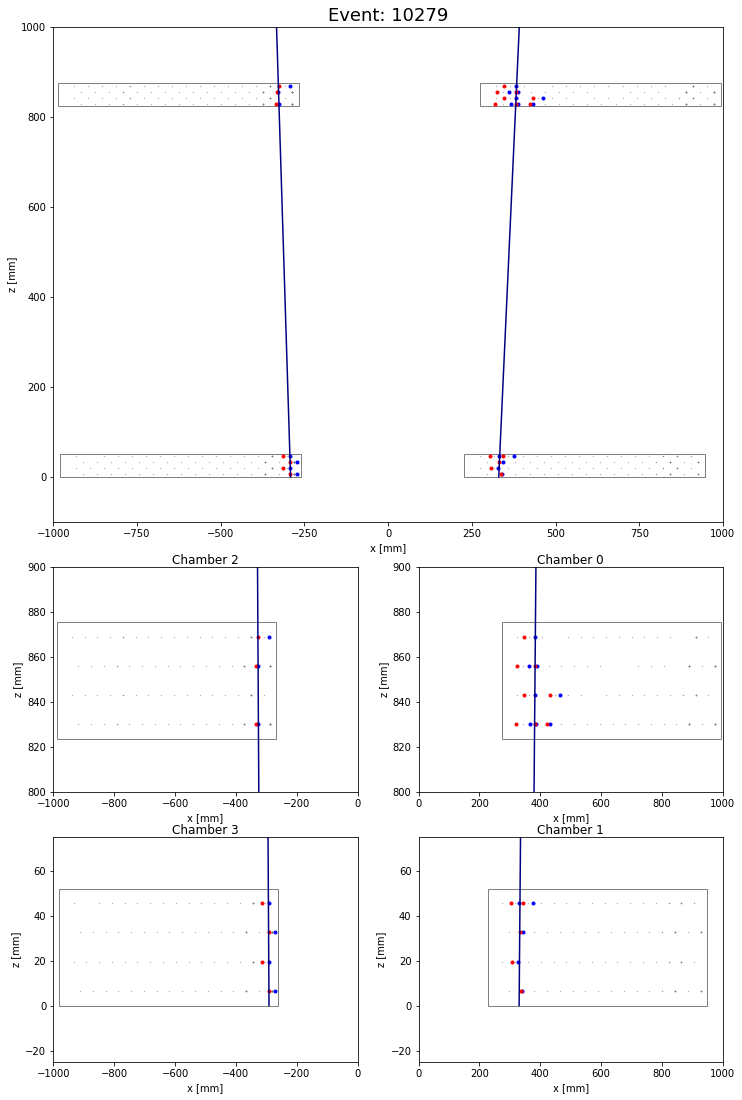

In [32]:
Make_Plot(good[153])

## Summary

The distribution of the hits across all Physics events seems to show that our hypothesis to consider hits between $6$ and $12$ was rather justifiable and might actually be considered too conservative for certain aspects.

The distribution of the slopes obtained from the global linear fits performed in this section (no local fits are computed in Physics) appears to be extremely reasonable: first off, we obtain highly symmetric results, in accordance with the fact that we are considering identical particles $\mu ^+ - \mu^-$ whose only difference is in fact in the spatial region, due to the opposite charges. 

Once again, the distribution of the residuals proves to be a clean gaussian both for the right and the left part of the detector, proving that the data has been fit well. 
We are unable to distinguish any clear difference between the right and left side of the detector; the former shows a wider distribution of the residuals but this aspect alone is inconclusive.

## Conclusions

Overall, we are satisfied with the results obtained from the Analysis performed. Our selection criterion is sensible and it is validated by the hit distribution. The global fit appears to be of good quality and the results produced are in accordance at least with expectations.

As a final result, we are able to estimate the number of good events found in the whole Physics dataset, meaning the number of muons actually observed throughout the experiment:
$$N_{\mu^{+}\mu^{-}} = 770 \pm 20$$ 
where the error is computed as the square root of the estimate, which is distributed as a Poissonian being a count.